In [2]:
import os
os.chdir("C:/Users/Ксения/palabos/examples/showCases/boundaryCondition")
import vtk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
reader = vtk.vtkXMLImageDataReader()
reader.SetFileName('vtk030000.vti')
reader.Update()

data = reader.GetOutput()
magn = data.GetPointData().GetArray(0)
v = data.GetPointData().GetArray(1)

n = data.GetNumberOfPoints()

In [4]:
magn, type(magn)

((vtkCommonCorePython.vtkFloatArray)000001A39AE8A5E8,
 vtkCommonCorePython.vtkFloatArray)

In [5]:
x = np.empty(n)
y = np.empty(n)
mag = np.empty(n)
vx = np.empty(n)
vy = np.empty(n)


for i in range(n):
    x[i] = data.GetPoint(i)[0]
    y[i] = data.GetPoint(i)[1]
    mag[i] = magn.GetValue(i)
    #print(v.GetValue(i))
    vx[i] = v.GetValue(2*i)
    vy[i] = v.GetValue(2*i +1)
    

In [6]:
mag

array([0.        , 0.24295673, 0.30469579, ..., 1.        , 1.        ,
       1.        ])

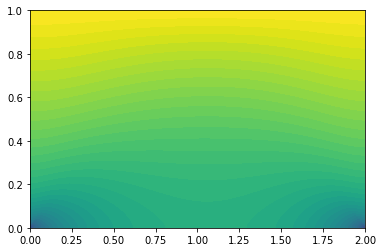

In [7]:
plt.tricontourf(x, y, mag, 64)


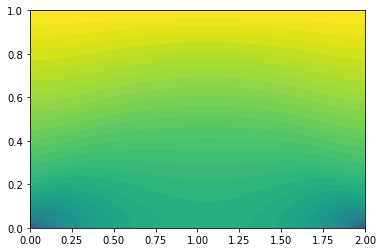

In [8]:
plt.tricontourf(x, y, vx, 64)

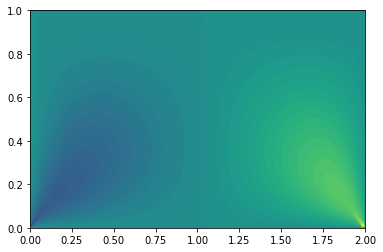

In [9]:
plt.tricontourf(x, y, vy, 64)

In [10]:
norm = matplotlib.colors.Normalize()
norm.autoscale(mag)

sm = matplotlib.cm.ScalarMappable(norm=norm)
sm.set_array([])

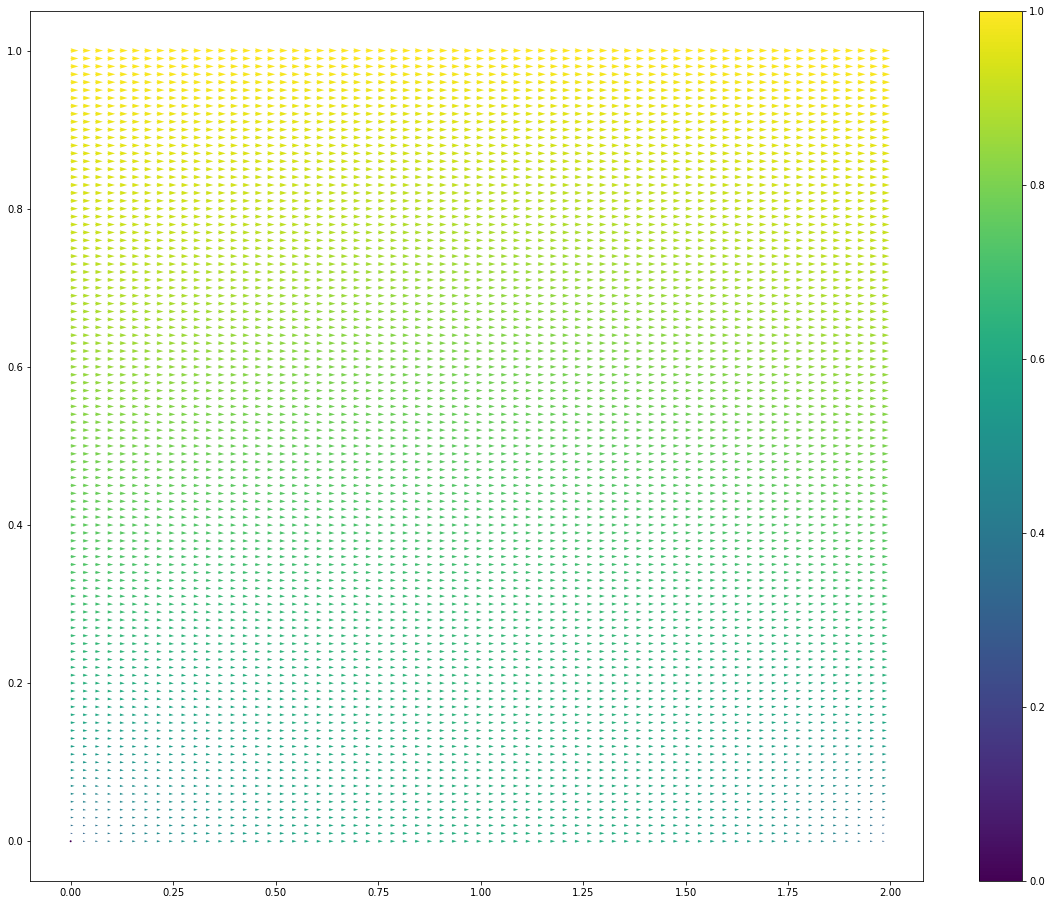

In [11]:
fig, ax = plt.subplots(figsize=(20,16))
step = 3
ax.quiver(x[::step], y[::step], vx[::step], vy[::step], mag[::step],)
plt.colorbar(sm)

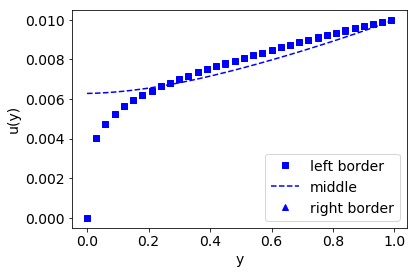

In [16]:
plt.rcParams.update({'font.size': 14})
nx = 201
ny = 101
u_real = 1. * y[::201] * 1e-2
plt.plot(y[::201][::3], mag[::201][::3] * 1e-2,'bs',  mfc='none', label='left border')
# plt.plot(y[::201][::3], u_real[::3],'black', label='analytical')
plt.plot(y[::201][::3], mag[100::201][::3] * 1e-2,'b--', mfc='none', label='middle')
plt.plot(y[::201][::3], mag[200::201][::3] * 1e-2,'b^',  mfc='none', label='right border')
plt.legend(loc=0, prop={'size': 14})
plt.xlabel("y") #, fontsize=16)
plt.ylabel("u(y)") #, fontsize=16)
plt.show()

In [83]:
# Compute error: L2 norm
error = np.zeros(nx)
for i in range(nx):
    error[i]=(np.sqrt(np.sum((vx[i::201] * 1e-2 - u_real)**2)))/np.sqrt(np.sum(u_real**2))
L2=1/nx*np.sum(error)
print(L2)

0.0010849900316547254
